**importing required libraries**

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

from scipy.stats import zscore

### Part A

**PROJECT OBJECTIVE: To understand K-means Clustering by applying on the Car Dataset to segment the cars into various categories.**

**Data Understanding & Exploration:**

A. Read ‘Car name.csv’ as a DataFrame and assign it to a variable

In [149]:
cdata = pd.read_csv("Car name.csv")
cdata.head()

,car_name
0,chevrolet chevelle malibu
1,buick skylark 320
2,plymouth satellite
3,amc rebel sst
4,ford torino


B. Read ‘Car-Attributes.json as a DataFrame and assign it to a variable.

In [150]:
import json
jsondata = pd.read_json("Car-Attributes.json")
jsondata.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


C. Merge both the DataFrames together to form a single DataFrame

In [151]:
cdf = pd.concat([jsondata, cdata], axis=1)

In [152]:
cdf.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [153]:
cdf.dtypes

mpg         float64
cyl           int64
disp        float64
hp           object
wt            int64
acc         float64
yr            int64
origin        int64
car_name     object
dtype: object

In [154]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mpg       398 non-null    float64
 1   cyl       398 non-null    int64  
 2   disp      398 non-null    float64
 3   hp        398 non-null    object 
 4   wt        398 non-null    int64  
 5   acc       398 non-null    float64
 6   yr        398 non-null    int64  
 7   origin    398 non-null    int64  
 8   car_name  398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


D. Print 5 point summary of the numerical features and share insights

In [155]:
cdf.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0


**Insights**

-**mpg** - The range for miles per gallon from min to max is between 9 - 46.6 with variation of 7.8. Mean and median are almost equal which makes this a normal distribution and there is no skewness

-**cyl** - Cylinders in cars vary between 3(min) - 8(max) with variation of 1.7 approx.

-**disp** - Mean is greater than median hence there is skewness and also there is difference between max value and 75th percentile. 

-**acc**- Varies between 8 to 25 approx with a variation of 2.76. Does not seem to have high skewness since mean and median are equal.

-**origin**- 3 countries of origin



**2. Data Preparation & Analysis:**

A. Check and print feature-wise percentage of missing values present in the data and impute with the best suitable approach.

In [156]:
cdf.isnull().sum()

mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
car_name    0
dtype: int64

Although it shows no null/missing values, the hp column is an object and to get the exact count we will need to handle it appropriately

In [157]:
# isdigit()? on 'horsepower' 
hpIsDigit = pd.DataFrame(cdf.hp.str.isdigit())

cdf[hpIsDigit['hp'] == False] 

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


In [158]:
# Missing values have a'?''
# Replace missing values with NaN
cdf = cdf.replace('?', np.nan)
cdf[hpIsDigit['hp'] == False] 

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name
32,25.0,4,98.0,NaN,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,1,amc concord dl


In [159]:
#checking for median in order to replace the nan values with median
cdf.median()

mpg         23.0
cyl          4.0
disp       148.5
hp          93.5
wt        2803.5
acc         15.5
yr          76.0
origin       1.0
dtype: float64

In [160]:
#replace hp with median
cdf['hp'].fillna((cdf['hp'].median()), inplace=True)
cdf.isnull().sum()

mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
car_name    0
dtype: int64

**B. Check for duplicate values in the data and impute with the best suitable approach.**

In [161]:
duplicate = cdf[cdf.duplicated()]
 
print("Duplicate Rows :")
 
duplicate

Duplicate Rows :


,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name


*
*


**C. Plot a pairplot for all features.**

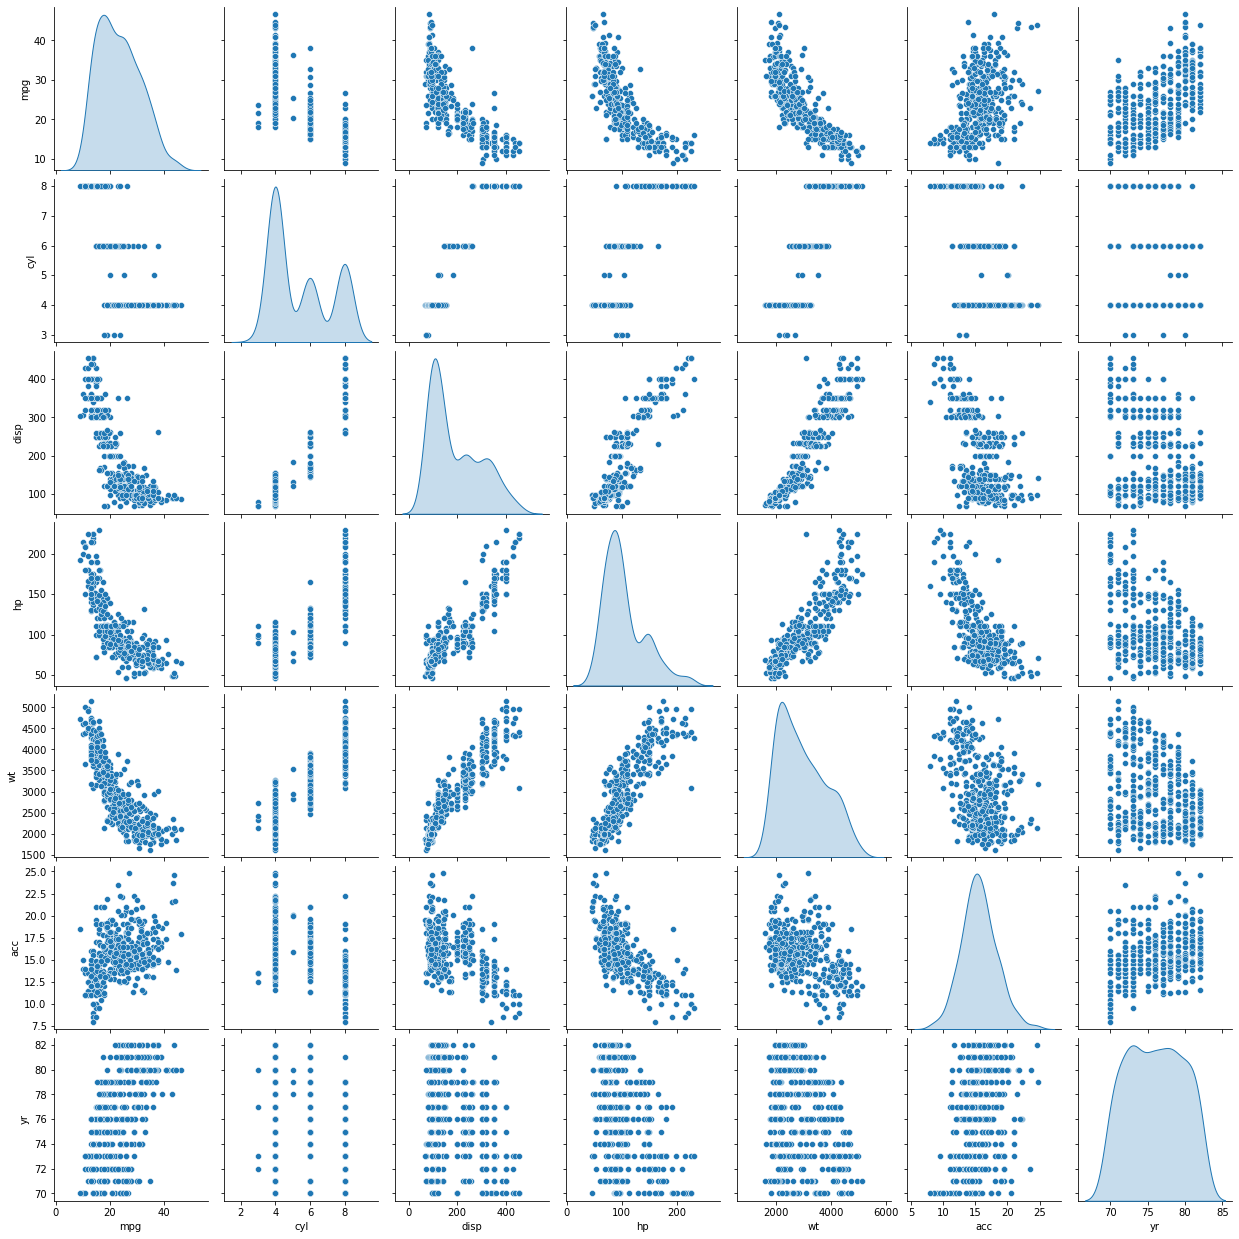

In [162]:
cdf_attr = cdf.iloc[:, 0:7]
sns.pairplot(cdf_attr, diag_kind='kde');

**D. Visualize a scatterplot for ‘wt’ and ‘disp’. Datapoints should be distinguishable by ‘cyl’.**

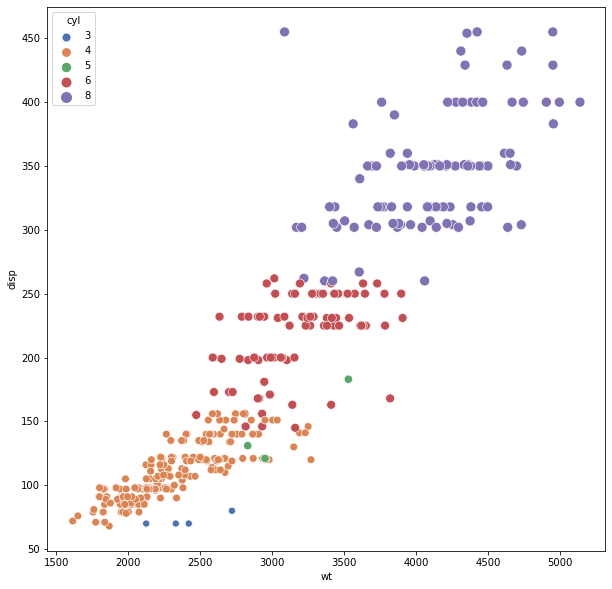

In [163]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(x=cdf['wt'], y=cdf['disp'], 
            hue=cdf['cyl'], ax = ax, size=cdf["cyl"],
    sizes=(50, 100), legend="full",palette="deep");

**E. Share insights for Q2.d**

-Cars with higher number of cylinders have evidently more weight and displacement

-Very few cars with 3 and 5 cylinder eingines are available.

-Weight and displacment are varying with inceasing number of cylinders.

  **F. Visualize a scatterplot for ‘wt’ and ’mpg’. Datapoints should be distinguishable by ‘cyl’**

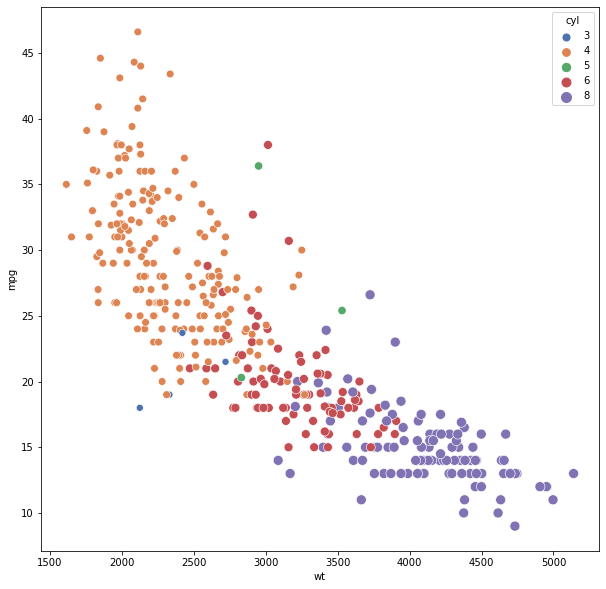

In [164]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(x=cdf['wt'], y=cdf['mpg'], 
            hue=cdf['cyl'], ax = ax, size=cdf["cyl"],
    sizes=(50, 100), legend="full",palette="deep");

**G. Share insights for Q2.f.**

-Cars with more number of cylinders and weight tend to have lower mileage. 

-Car Weight is affecting mpg more than the number of cylinder comparatively


**H. Check for unexpected values in all the features and datapoints with such values.**

Unexpected values like ? in the dataframe are treated above already

**3. Clustering:**

-A. Apply K-Means clustering for 2 to 10 clusters

In [165]:
cdf_attr = cdf.iloc[:,0:7] 
cdf_attr.head()

,mpg,cyl,disp,hp,wt,acc,yr
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70


In [166]:
cdf_scaled = cdf_attr.apply(zscore)
cdf_scaled.head()

,mpg,cyl,disp,hp,wt,acc,yr
0,-0.706439,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426
1,-1.090751,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426
2,-0.706439,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426
3,-0.962647,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426
4,-0.834543,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426


In [169]:
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans

clusters=range(2,11)
wss=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(cdf_scaled)
    prediction=model.predict(cdf_scaled)
    wss.append(model.inertia_)
wss    

[1294.8418950727323,
 946.019790855379,
 738.4159737149639,
 665.3827148360616,
 598.7788442581578,
 539.8827454336515,
 496.1375683765665,
 455.266611419891,
 424.7489335709606]

**B. Plot a visual and find elbow point.**

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

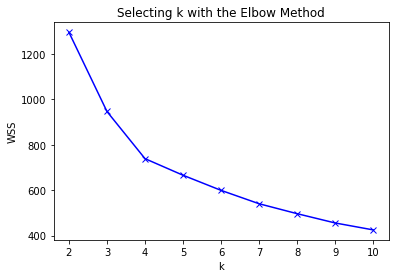

In [170]:
plt.plot(clusters, wss, 'bx-')
plt.xlabel('k')
plt.ylabel('WSS')
plt.title('Selecting k with the Elbow Method')

-With above visual using elbow method we can see the line bends at 4

**D. Train a K-means clustering model once again on the optimal number of clusters.**

In [171]:
final_model = KMeans(n_clusters = 4,random_state=0)
final_model.fit(cdf_scaled)
prediction1 = final_model.predict(cdf_scaled)

**E. Add a new feature in the DataFrame which will have labels based upon cluster value**

In [172]:
cdf["GROUP"] = prediction1
cdf_scaled["GROUP"] = prediction1
print("Groups Assigned : \n")
cdf.head(100)

Groups Assigned : 



,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name,GROUP
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,3
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,3
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,3
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,3
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,3
...,...,...,...,...,...,...,...,...,...,...
95,12.0,8,455.0,225.0,4951,11.0,73,1,buick electra 225 custom,3
96,13.0,8,360.0,175.0,3821,11.0,73,1,amc ambassador brougham,3
97,18.0,6,225.0,105.0,3121,16.5,73,1,plymouth valiant,1
98,16.0,6,250.0,100.0,3278,18.0,73,1,chevrolet nova custom,1


**F. Plot a visual and color the datapoints based upon clusters**

In [173]:
cdf_Clust = cdf.groupby(['GROUP'])
cdf_Clust.mean()

,mpg,cyl,disp,hp,wt,acc,yr,origin
GROUP,,,,,,,,
0,25.056436,4.009901,110.420792,83.143564,2335.821782,16.450495,73.633663,1.990099
1,19.621111,6.177778,225.511111,103.005556,3262.855556,16.392222,76.200000,1.166667
2,32.794690,4.053097,111.778761,75.929204,2316.849558,16.611504,80.097345,2.000000
3,14.429787,8.000000,350.042553,162.393617,4157.978723,12.576596,73.468085,1.000000


Text(0.5, 1.0, 'hp v/s acc')

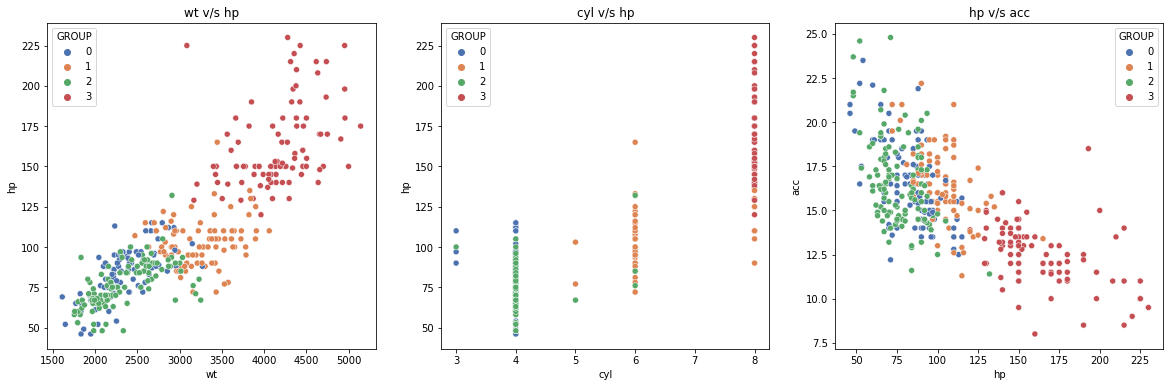

In [174]:
plt.figure(figsize = (20, 6))
ax = plt.subplot(1,3,1)
sns.scatterplot(x=cdf['wt'], y=cdf['hp'], hue = cdf['GROUP'], ax = ax, sizes=(50, 100), legend="full",palette="deep");
plt.title("wt v/s hp")

ax = plt.subplot(1,3,2)
sns.scatterplot(x=cdf['cyl'], y=cdf['hp'], hue = cdf['GROUP'], ax = ax, sizes=(50, 100), legend="full",palette="deep");
plt.title("cyl v/s hp")

ax = plt.subplot(1,3,3)
sns.scatterplot(x=cdf['hp'], y=cdf['acc'], hue = cdf['GROUP'], ax = ax, sizes=(50, 100), legend="full",palette="deep");
plt.title("hp v/s acc")

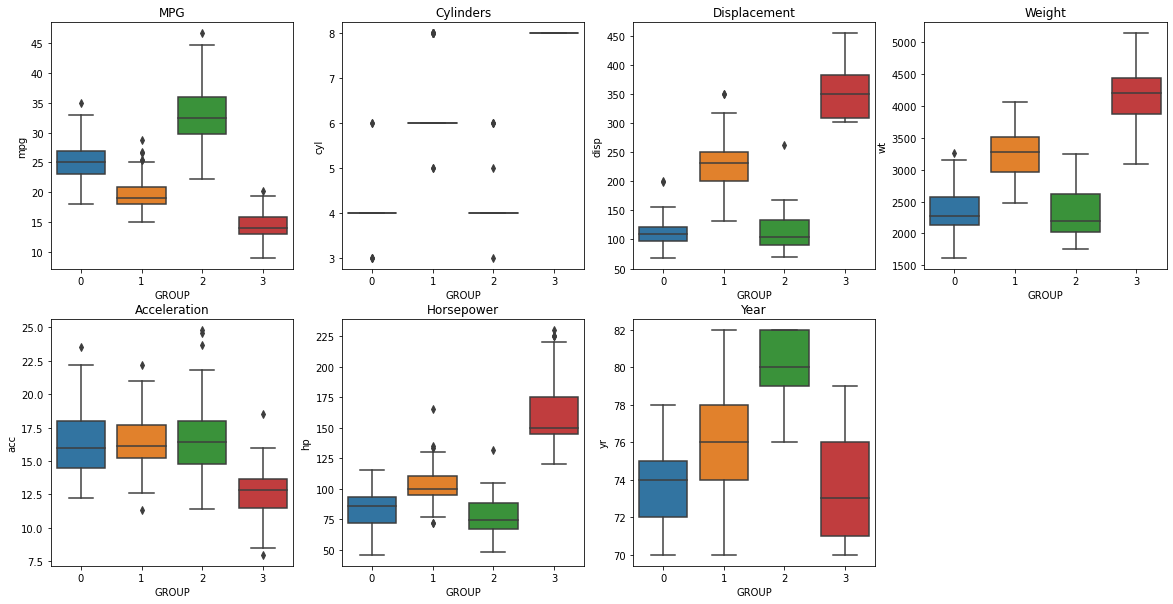

In [175]:
plt.figure(figsize = (20, 10))
ax = plt.subplot(2,4,1)
sns.boxplot( y=cdf["mpg"], x=cdf["GROUP"], ax=ax );
plt.title("MPG")

ax = plt.subplot(2,4,2)
sns.boxplot( y=cdf["cyl"], x=cdf["GROUP"],ax = ax );
plt.title("Cylinders")

ax = plt.subplot(2,4,3)
sns.boxplot( y=cdf["disp"], x=cdf["GROUP"],ax = ax );
plt.title("Displacement")

ax = plt.subplot(2,4,4)
sns.boxplot( y=cdf["wt"], x=cdf["GROUP"], ax=ax );
plt.title("Weight")

ax = plt.subplot(2,4,5)
sns.boxplot( y=cdf["acc"], x=cdf["GROUP"],ax = ax );
plt.title("Acceleration")

ax = plt.subplot(2,4,6)
sns.boxplot( y=cdf["hp"], x=cdf["GROUP"],ax = ax );
plt.title("Horsepower")


ax = plt.subplot(2,4,7)
sns.boxplot( y=cdf["yr"], x=cdf["GROUP"],ax = ax );
plt.title("Year")

plt.show()


**G. Pass a new DataPoint and predict which cluster it belongs to**

In [176]:
cdf.head(100)

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name,GROUP
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,3
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,3
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,3
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,3
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,3
...,...,...,...,...,...,...,...,...,...,...
95,12.0,8,455.0,225.0,4951,11.0,73,1,buick electra 225 custom,3
96,13.0,8,360.0,175.0,3821,11.0,73,1,amc ambassador brougham,3
97,18.0,6,225.0,105.0,3121,16.5,73,1,plymouth valiant,1
98,16.0,6,250.0,100.0,3278,18.0,73,1,chevrolet nova custom,1


In [177]:
import pickle

filename = 'finalized_model.sav'
pickle.dump(final_model, open(filename, 'wb'))

In [181]:
loaded_model = pickle.load(open(filename, 'rb'))

loaded_model.predict([[13,8,360,175,3130,11.0,73]])

array([3])

### Part B

**DOMAIN:** Automobile

**• CONTEXT:** The purpose is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette. The
vehicle may be viewed from one of many different angles.

**• DATA DESCRIPTION:** The data contains features extracted from the silhouette of vehicles in different angles. Four "Corgie" model vehicles were
used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles
was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to
distinguish between the cars.

• All the features are numeric i.e. geometric features extracted from the silhouette.

**• PROJECT OBJECTIVE:** Apply dimensionality reduction technique – PCA and train a model and compare relative results

**1. Data Understanding & Cleaning:** 

A. Read ‘vehicle.csv’ and save as DataFrame. 

In [182]:
df = pd.read_csv("vehicle.csv")
df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


**B. Check percentage of missing values and impute with correct approach.**

In [183]:
df.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [184]:
df = df.replace(' ', np.nan)

for i in df.columns[:17]:
    med_val = df[i].median()
    df[i] = df[i].fillna(med_val)


In [185]:
df.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

**C. Visualize a Pie-chart and print percentage of values for variable ‘class’**

In [186]:
df.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

In [187]:
#changing class attribute to category since it should not be an object

df['class'] = df['class'].astype('category')

<AxesSubplot:ylabel='class'>

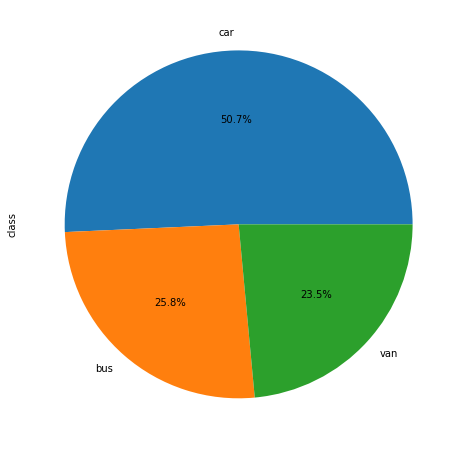

In [188]:
df['class'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(15,8))

**D. Check for duplicate rows in the data and impute with correct approach.**

In [189]:
duplicates = df[df.duplicated()]
 
print("Duplicate Rows :")
 
duplicates

Duplicate Rows :


,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class


In [190]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

df['class'] = labelencoder.fit_transform(df['class'])
df['class'].value_counts()

1    429
0    218
2    199
Name: class, dtype: int64

### **2. Data Preparation:**

**A. Split data into X and Y. [Train and Test optional]**

In [191]:
from sklearn.model_selection import train_test_split

X=df.drop(columns ='class')
y = df['class']


**B. Standardize the Data.**

In [192]:
from scipy.stats import zscore
XScaled=X.apply(zscore)
XScaled.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,0.160580,0.518073,0.057177,0.273363,1.310398,0.311542,-0.207598,0.136262,-0.224342,0.758332,-0.401920,-0.341934,0.285705,-0.327326,-0.073812,0.380870,-0.312012,0.183957
1,-0.325470,-0.623732,0.120741,-0.835032,-0.593753,0.094079,-0.599423,0.520519,-0.610886,-0.344578,-0.593357,-0.619724,-0.513630,-0.059384,0.538390,0.156798,0.013265,0.452977
2,1.254193,0.844303,1.519141,1.202018,0.548738,0.311542,1.148719,-1.144597,0.935290,0.689401,1.097671,1.109379,1.392477,0.074587,1.558727,-0.403383,-0.149374,0.049447
3,-0.082445,-0.623732,-0.006386,-0.295813,0.167907,0.094079,-0.750125,0.648605,-0.610886,-0.344578,-0.912419,-0.738777,-1.466683,-1.265121,-0.073812,-0.291347,1.639649,1.529056
4,-1.054545,-0.134387,-0.769150,1.082192,5.245643,9.444962,-0.599423,0.520519,-0.610886,-0.275646,1.671982,-0.648070,0.408680,7.309005,0.538390,-0.179311,-1.450481,-1.699181


### **3. Model Building:**

**A. Train a base Classification model using SVM.**

In [193]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn import metrics

In [194]:
X_train, X_test, y_train, y_test = train_test_split(XScaled,y, test_size = 0.3, random_state = 10)

In [195]:
clf = SVC()
clf.fit(X_train, y_train)
prediction_test = clf.predict(X_test)
prediction_train = clf.predict(X_train)

**B. Print Classification metrics for train data**

In [196]:
accu_train = round(metrics.accuracy_score(y_train, prediction_train),3)
accu_test = round(metrics.accuracy_score(y_test, prediction_test),3)
acc_df = pd.DataFrame([[accu_train],[accu_test]], index=['Training', 'Testing'], columns=['Accuracy'])  
acc_df

,Accuracy
Training,0.975
Testing,0.961


In [197]:
confusion_matrix = pd.crosstab(y_test, prediction_test, rownames=['Actual'], colnames=['Predicted'])
confusion_matrix

Predicted,0,1,2
Actual,,,
0,68,1,2
1,0,120,5
2,0,2,56


In [198]:
print("Classification Report:\n",metrics.classification_report(prediction_train,y_train))

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       146
           1       0.98      0.98      0.98       302
           2       0.96      0.94      0.95       144

    accuracy                           0.97       592
   macro avg       0.97      0.97      0.97       592
weighted avg       0.97      0.97      0.97       592



**C. Apply PCA on the data with 10 components**

In [199]:
covMatrix = np.cov(XScaled,rowvar=False)
print(covMatrix)

[[ 1.00118343  0.68569786  0.79086299  0.69055952  0.09164265  0.14842463
   0.81358214 -0.78968322  0.81465658  0.67694334  0.76297234  0.81497566
   0.58593517 -0.24988794  0.23635777  0.15720044  0.29889034  0.36598446]
 [ 0.68569786  1.00118343  0.79325751  0.6216467   0.15396023  0.25176438
   0.8489411  -0.82244387  0.84439802  0.96245572  0.79724837  0.83693508
   0.92691166  0.05200785  0.14436828 -0.01145212 -0.10455005  0.04640562]
 [ 0.79086299  0.79325751  1.00118343  0.76794246  0.15864319  0.26499957
   0.90614687 -0.9123854   0.89408198  0.77544391  0.86253904  0.88706577
   0.70660663 -0.22621115  0.1140589   0.26586088  0.14627113  0.33312625]
 [ 0.69055952  0.6216467   0.76794246  1.00118343  0.66423242  0.45058426
   0.73529816 -0.79041561  0.70922371  0.56962256  0.79435372  0.71928618
   0.53700678 -0.18061084  0.04877032  0.17394649  0.38266622  0.47186659]
 [ 0.09164265  0.15396023  0.15864319  0.66423242  1.00118343  0.64949139
   0.10385472 -0.18325156  0.07969

In [200]:
pca = PCA(n_components=10)
pca.fit(XScaled)

PCA(n_components=10)

**D. Visualize Cumulative Variance Explained with Number of Components.**

In [201]:
print(pca.explained_variance_)

[9.40460261 3.01492206 1.90352502 1.17993747 0.91726063 0.53999263
 0.35887012 0.22193246 0.1606086  0.09185722]


In [202]:
print(pca.components_)

[[ 2.75283688e-01  2.93258469e-01  3.04609128e-01  2.67606877e-01
   8.05039890e-02  9.72756855e-02  3.17092750e-01 -3.14133155e-01
   3.13959064e-01  2.82830900e-01  3.09280359e-01  3.13788457e-01
   2.72047492e-01 -2.08137692e-02  4.14555082e-02  5.82250207e-02
   3.02795063e-02  7.41453913e-02]
 [-1.26953763e-01  1.25576727e-01 -7.29516436e-02 -1.89634378e-01
  -1.22174860e-01  1.07482875e-02  4.81181371e-02  1.27498515e-02
   5.99352482e-02  1.16220532e-01  6.22806229e-02  5.37843596e-02
   2.09233172e-01  4.88525148e-01 -5.50899716e-02 -1.24085090e-01
  -5.40914775e-01 -5.40354258e-01]
 [-1.19922479e-01 -2.48205467e-02 -5.60143254e-02  2.75074211e-01
   6.42012966e-01  5.91801304e-01 -9.76283108e-02  5.76484384e-02
  -1.09512416e-01 -1.70641987e-02  5.63239801e-02 -1.08840729e-01
  -3.14636493e-02  2.86277015e-01 -1.15679354e-01 -7.52828901e-02
   8.73592034e-03  3.95242743e-02]
 [ 7.83843562e-02  1.87337408e-01 -7.12008427e-02 -4.26053415e-02
   3.27257119e-02  3.14147277e-02 -9.

In [203]:
print(pca.explained_variance_ratio_)

[0.52186034 0.16729768 0.10562639 0.0654746  0.05089869 0.02996413
 0.01991366 0.01231501 0.00891215 0.00509715]


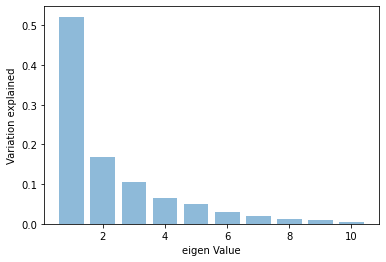

In [204]:
plt.bar(list(range(1,11)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

**E. Draw a horizontal line on the above plot to highlight the threshold of 90%**

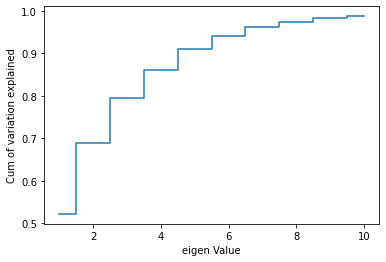

In [205]:
plt.step(list(range(1,11)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

**F. Apply PCA on the data. This time Select Minimum Components with 90% or above variance explained**

In [206]:
pca1 = PCA(n_components=6)
xpca = pca1.fit_transform(XScaled)

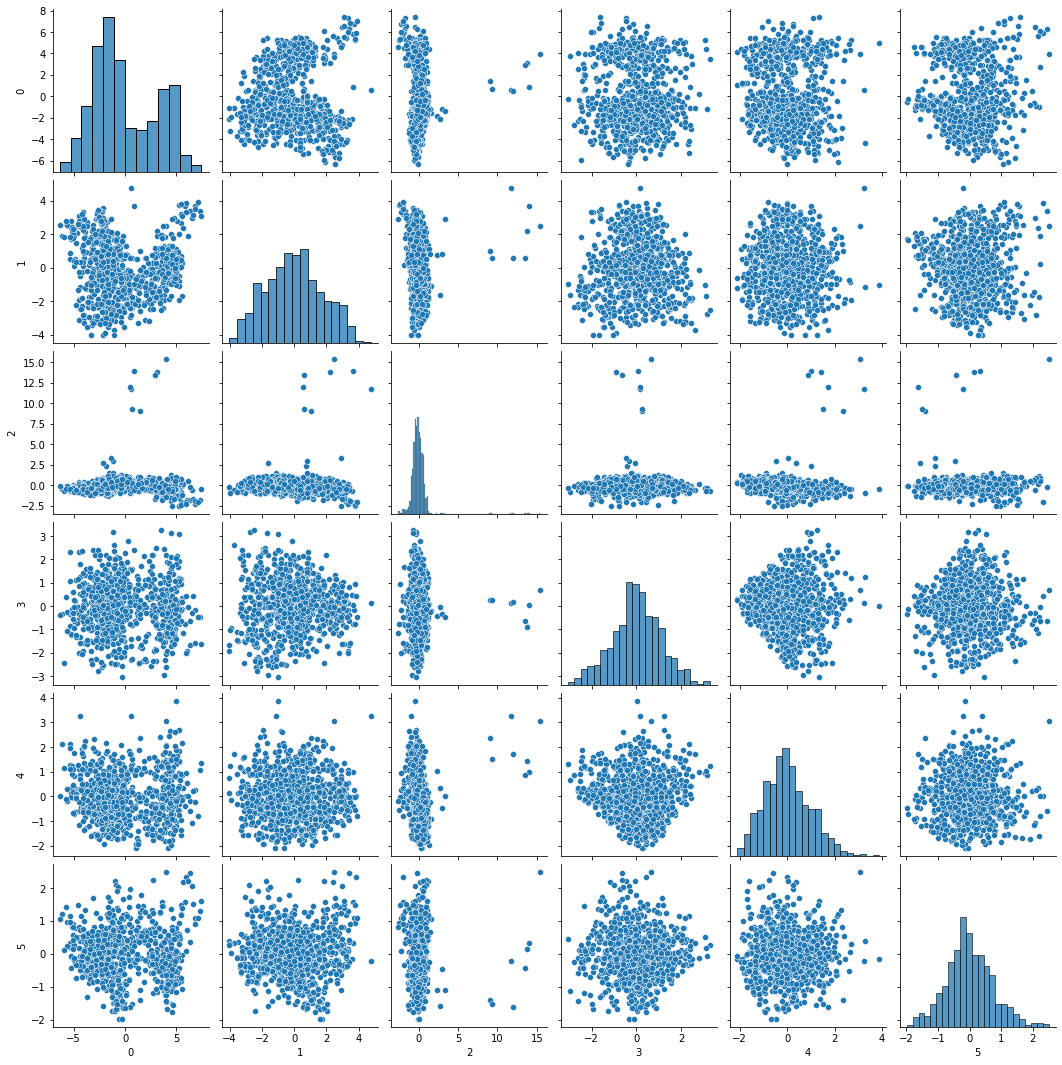

In [207]:
sns.pairplot(pd.DataFrame(xpca))

**G. Train SVM model on components selected from above step**

In [208]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(xpca,y, test_size = 0.3, random_state = 10)

In [209]:
svm = SVC()
svm.fit(X_train1, y_train1)  
y_train_pred1 = svm.predict(X_train1)
y_test_pred1 = svm.predict(X_test1)


accuracy_train = round(metrics.accuracy_score(y_train1, y_train_pred1),3)
accuracy_test = round(metrics.accuracy_score(y_test1, y_test_pred1),3)
acc_pca = pd.DataFrame([[accuracy_train],[accuracy_test]], index=['Training', 'Testing'], columns=['Accuracy'])  
acc_pca

,Accuracy
Training,0.902
Testing,0.858


**H. Print Classification metrics for train data of above model and share insights**

In [210]:
confusion_matrix1 = pd.crosstab(y_test1, y_test_pred1, rownames=['Actual'], colnames=['Predicted'])
confusion_matrix1

Predicted,0,1,2
Actual,,,
0,57,10,4
1,3,112,10
2,0,9,49


In [211]:
print("Classification Report:\n",metrics.classification_report(y_train_pred1,y_train1))

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.92      0.88       136
           1       0.94      0.90      0.92       318
           2       0.87      0.89      0.88       138

    accuracy                           0.90       592
   macro avg       0.89      0.90      0.89       592
weighted avg       0.90      0.90      0.90       592



**4. Performance Improvement:**

**A. Train another SVM on the components out of PCA. Tune the parameters to improve performance**

In [212]:
from sklearn.model_selection import GridSearchCV

svm1 = SVC()

parameters = {'kernel':('rbf', 'poly', 'sigmoid'), 'gamma':('scale','auto'), 'C':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], 'class_weight': (None, 'balanced')}
svm_cv = GridSearchCV(svm1, parameters, scoring='accuracy')
svm_cv.fit(X_train1, y_train1)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
                         'class_weight': (None, 'balanced'),
                         'gamma': ('scale', 'auto'),
                         'kernel': ('rbf', 'poly', 'sigmoid')},
             scoring='accuracy')

******

**B. Share best Parameters observed from above step**

In [213]:
print("Best parameters :",svm_cv.best_params_)

Best parameters : {'C': 1, 'class_weight': None, 'gamma': 'auto', 'kernel': 'rbf'}


*****

**C. Print Classification metrics for train data of above model and share relative improvement in performance in all the models along with
insights**

In [214]:
print(" Test accuracy :",svm_cv.score(X_train1,y_train1))
print(" Test accuracy :",svm_cv.score(X_test1,y_test1))

y_train_pred2 = svm_cv.predict(X_train1)
y_test_pred2 = svm_cv.predict(X_test1)



#classification matrix train data
print("Classification Report for training:\n",metrics.classification_report(y_train_pred2,y_train1))


 Test accuracy : 0.9256756756756757
 Test accuracy : 0.9094488188976378
Classification Report for training:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91       147
           1       0.95      0.94      0.94       308
           2       0.89      0.92      0.91       137

    accuracy                           0.93       592
   macro avg       0.92      0.92      0.92       592
weighted avg       0.93      0.93      0.93       592



In [215]:
confusion_matrix1 = pd.crosstab(y_test1, y_test_pred2, rownames=['Actual'], colnames=['Predicted'])
confusion_matrix1

Predicted,0,1,2
Actual,,,
0,65,6,0
1,4,114,7
2,1,5,52


In [216]:
#classification matrix test data
print("Classification Report for testing data:\n",metrics.classification_report(y_test_pred2,y_test1)) 

Classification Report for testing data:
               precision    recall  f1-score   support

           0       0.92      0.93      0.92        70
           1       0.91      0.91      0.91       125
           2       0.90      0.88      0.89        59

    accuracy                           0.91       254
   macro avg       0.91      0.91      0.91       254
weighted avg       0.91      0.91      0.91       254



**Accuracy scores for Model before PCA and diamensionality reduction**

In [217]:
accu_train = round(metrics.accuracy_score(y_train, prediction_train),3)
accu_test = round(metrics.accuracy_score(y_test, prediction_test),3)
acc_df = pd.DataFrame([[accu_train],[accu_test]], index=['Training', 'Testing'], columns=['Accuracy'])  
acc_df

,Accuracy
Training,0.975
Testing,0.961


**Insights**

**-The accuracy scores for model before PCA and dimesnionality reduction for test were at 96%**

**-The accuracy score for test data on pCA components(after diamensionality reduction) was 0.858 which have been further imroved to 91% approc after hyperparameter tuning**

**-We have great accuracy score even after reducing the diamensions to 6 after PCA**
**-Precsion and recall values are also good. Most of the values in all classes are being predicted correctly as per the confusion matrix as well**

****************
***************

**5. Data Understanding & Cleaning:**

**A. Explain pre-requisite/assumptions of PCA**

----> There needs to be a linear relationship between all variables. The reason for this assumption is that a PCA is based on Pearson correlation coefficients, and as such, there needs to be a linear relationship between the variables. 

----> For PCA to produce a reliable result, large enough sample sizes are required. 

----> Assumes that components with larger variance correspond to interesting dynamics and lower ones correspond to noise. 

----> Data should be suitable for data reduction. You need to have adequate correlations between the variables in order for variables to be reduced to a smaller number of components. 

----> There should be no significant outliers. Outliers are important because these can have a disproportionate influence on your results.



**B.Explain advantages and limitations of PCA**

**Advantages of PCA**

----> Removes the correlated attributes.

----> Help to reduce overfitting.

----> Improves the data visualization.

----> It also help to improve the performance of Algorithm,

**Limitations of PCA**

----> Data normalization must be needed before applying PCA

----> Some level of information loss.

---->Independent variables are becoming less interpretable